In [1]:
from fastai.basics import *
absolute_path = Path().absolute()
sys.path.append(str(absolute_path.parents[0]))
from enveco.data.image import *

In [47]:
chms = os.listdir(data_path/'AV_chm')

In [48]:
import rasterio as rio

In [85]:
data_path/f'AV_chm/{chms[123]}'

Path('../../enveco_data/enveco/AV_chm/903175.tif')

In [84]:
import xarray as xr
dat = xr.open_rasterio(data_path/f'AV_chm/{chms[123]}')
dat

<xarray.DataArray (band: 1, y: 60, x: 61)>
array([[[-999999., -999999., ..., -999999., -999999.],
        [-999999., -999999., ..., -999999., -999999.],
        ...,
        [-999999., -999999., ..., -999999., -999999.],
        [-999999., -999999., ..., -999999., -999999.]]], dtype=float32)
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 6.897e+06 6.897e+06 6.897e+06 ... 6.897e+06 6.897e+06
  * x        (x) float64 3.74e+05 3.74e+05 3.74e+05 ... 3.74e+05 3.74e+05
Attributes:
    transform:   (0.29999999999980914, 0.0, 374026.2, 0.0, -0.3, 6897053.1)
    res:         (0.29999999999980914, 0.3)
    is_tiled:    0
    nodatavals:  (-999999.0,)
    scales:      (1.0,)
    offsets:     (0.0,)

In [87]:
tiffile = xr.open_rasterio('../../enveco_data/enveco/AV_tif/903175.tif')
tiffile

<xarray.DataArray (band: 3, y: 61, x: 61)>
array([[[ 18,  17, ...,  30,  30],
        [ 18,  16, ...,  21,  22],
        ...,
        [109,  77, ...,  89,  95],
        [139, 100, ...,  93,  95]],

       [[ 25,  26, ...,  31,  31],
        [ 25,  25, ...,  28,  29],
        ...,
        [ 78,  55, ...,  42,  43],
        [100,  69, ...,  47,  48]],

       [[ 29,  29, ...,  31,  33],
        [ 29,  28, ...,  31,  32],
        ...,
        [ 76,  51, ...,  46,  48],
        [ 98,  67, ...,  53,  54]]], dtype=uint8)
Coordinates:
  * band     (band) int64 1 2 3
  * y        (y) float64 6.897e+06 6.897e+06 6.897e+06 ... 6.897e+06 6.897e+06
  * x        (x) float64 3.74e+05 3.74e+05 3.74e+05 ... 3.74e+05 3.74e+05
Attributes:
    transform:      (0.2999999999999994, 0.0, 374026.39999999985, 0.0, -0.299...
    crs:            +proj=utm +zone=35 +ellps=GRS80 +units=m +no_defs=True
    res:            (0.2999999999999994, 0.2999999999999994)
    is_tiled:       0
    nodatavals:     (nan, nan, nan)
    scales:         (1.0, 1.0, 1.0)
    offsets:        (0.0, 0.0, 0.0)
    AREA_OR_POINT:  Area

In [205]:
with rio.open(data_path/f'AV_chm/{chms[666]}') as f:
    vals = f.read()
    bounds = f.bounds

vals = np.pad(vals, ((0,0), (0, 61-vals.shape[1]), (0,61-vals.shape[2])))

In [206]:
vals.max()

12.451

In [207]:
chms[666]

'909173.tif'

In [242]:
def h_from_chm(row):
    with rio.open(data_path/f'AV_chm/{row.sampleplotid}.tif') as f:
        vals = f.read()

    vals = np.pad(vals, ((0,0), (0, 61-vals.shape[1]), (0,61-vals.shape[2])))
    return np.quantile(vals, .98)

In [243]:
train['pred_h'] = train.apply(lambda row: h_from_chm(row), axis=1)

In [244]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [245]:
rmse(train.pred_h, train.h)

1.5312084646146191

In [246]:
train[train.sampleplotid==909173]

,sampleplotid,x,y,measurementdate,g,d,h,v,v_ma,v_ku,v_lp,myear,filename_1,a_date_1,a_window_1,filename_2,a_date_2,a_window_2,v_lp_proc,pred_h
471,909173,373785.47,6922354.96,2013,24.8,11.4,10.4,134.29,42.49,59.79,32.01,2013,/wrk/project_ogiir-csc/mml/laserkeilaus/2008_17_automaattinen/2013/20130113_BLOM_ahtari_block3_kesa/1/N4232E4.laz,2013-07-14,C,NaN,NaN,NaN,24,11.2496


In [212]:
np.quantile(vals, .95)

10.494999885559082

In [184]:
chms[666]

'909173.tif'

In [185]:
bounds

BoundingBox(left=365414.39999999997, bottom=6897061.8, right=365432.39999999997, top=6897080.1)

In [186]:
with rio.open(f'../../enveco_data/enveco/AV_tif/{chms[111]}') as f:
    imvals = f.read()
    print(f.bounds)

BoundingBox(left=365414.2999999999, bottom=6897061.800000001, right=365432.59999999986, top=6897080.100000001)


In [187]:
imvals.shape, vals.shape

((3, 61, 61), (1, 61, 61))

In [188]:
vals[vals < 0] = 0

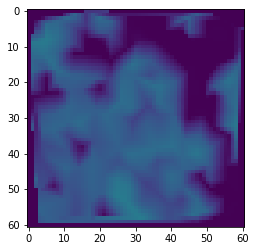

In [247]:
plt.imshow(vals[0], vmin=0, vmax=30, cmap='viridis')

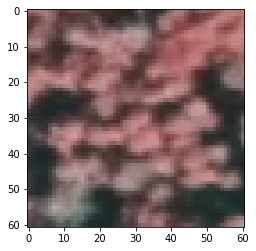

In [193]:
plt.imshow(imvals.T.swapaxes(0,1)/255)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


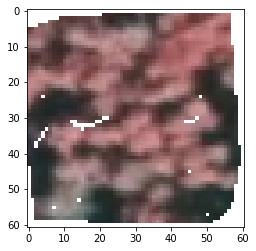

In [194]:
tempim = np.zeros((61,61,1))
R = np.ma.masked_where(vals[0] < 1.3, imvals[0])/255
G = np.ma.masked_where(vals[0] < 1.3, imvals[1])/255
B = np.ma.masked_where(vals[0] < 1.3, imvals[2])/255
plt.imshow(np.dstack((R,G,B)))

In [81]:
from mpl_toolkits.mplot3d import Axes3D

In [82]:
vals.shape

(1, 60, 61)

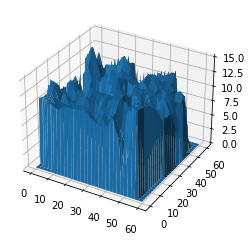

In [196]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(range(61), range(61))
ax.plot_surface(X, Y, vals[0])

In [20]:
data_path = Path('../../enveco_data/enveco/')

train = pd.read_csv(data_path/'AV.leaf.on.train.csv')
train = train.rename(columns = lambda x: re.sub('[\.]+', '_', x))


In [3]:
train.head()

,sampleplotid,x,y,measurementdate,g,d,h,v,v_ma,v_ku,v_lp,myear,filename_1,a_date_1,a_window_1,filename_2,a_date_2,a_window_2,v_lp_proc
0,901034,313598.50,6888193.46,2013,30.0,25.9,23.9,336.62,50.11,27.73,258.78,2013,/wrk/project_ogiir-csc/mml/laserkeilaus/2008_17_automaattinen/2013/20130114_BLOM_ahtari_block2_kesa/1/N4121B3.laz,2013-07-11,C,NaN,NaN,NaN,77
1,901038,314591.78,6888461.84,2013,18.6,16.0,15.9,146.00,142.50,0.00,3.50,2013,/wrk/project_ogiir-csc/mml/laserkeilaus/2008_17_automaattinen/2013/20130114_BLOM_ahtari_block2_kesa/1/N4121D1.laz,2013-07-11,C,NaN,NaN,NaN,2
2,901044,317890.37,6888182.49,2013,26.8,18.4,18.4,240.46,139.89,81.77,18.79,2013,/wrk/project_ogiir-csc/mml/laserkeilaus/2008_17_automaattinen/2013/20130114_BLOM_ahtari_block2_kesa/1/N4121D3.laz,2013-07-11,C,NaN,NaN,NaN,8
3,901048,318879.42,6888447.55,2013,34.3,20.2,19.3,321.29,72.10,172.35,76.84,2013,/wrk/project_ogiir-csc/mml/laserkeilaus/2008_17_automaattinen/2013/20130114_BLOM_ahtari_block2_kesa/1/N4121D3.laz,2013-07-11,C,NaN,NaN,NaN,24
4,901054,322193.41,6888196.04,2013,13.8,10.0,9.1,67.10,57.40,9.70,0.00,2013,/wrk/project_ogiir-csc/mml/laserkeilaus/2008_17_automaattinen/2013/20130114_BLOM_ahtari_block2_kesa/1/N4121F1.laz,2013-07-11,C,NaN,NaN,NaN,0


Select only plots with at least 75% broadleaved trees.

In [4]:
def find_lp_maj(row):
    lp_pct = row.v_lp/row.v
    if lp_pct >= 0.75: return 1
    return 0

In [5]:
train['lp_maj'] = train.apply(lambda row: find_lp_maj(row), axis=1)

In [6]:
train.head()

,sampleplotid,x,y,measurementdate,g,d,h,v,v_ma,v_ku,v_lp,myear,filename_1,a_date_1,a_window_1,filename_2,a_date_2,a_window_2,v_lp_proc,lp_maj
0,901034,313598.50,6888193.46,2013,30.0,25.9,23.9,336.62,50.11,27.73,258.78,2013,/wrk/project_ogiir-csc/mml/laserkeilaus/2008_17_automaattinen/2013/20130114_BLOM_ahtari_block2_kesa/1/N4121B3.laz,2013-07-11,C,NaN,NaN,NaN,77,1
1,901038,314591.78,6888461.84,2013,18.6,16.0,15.9,146.00,142.50,0.00,3.50,2013,/wrk/project_ogiir-csc/mml/laserkeilaus/2008_17_automaattinen/2013/20130114_BLOM_ahtari_block2_kesa/1/N4121D1.laz,2013-07-11,C,NaN,NaN,NaN,2,0
2,901044,317890.37,6888182.49,2013,26.8,18.4,18.4,240.46,139.89,81.77,18.79,2013,/wrk/project_ogiir-csc/mml/laserkeilaus/2008_17_automaattinen/2013/20130114_BLOM_ahtari_block2_kesa/1/N4121D3.laz,2013-07-11,C,NaN,NaN,NaN,8,0
3,901048,318879.42,6888447.55,2013,34.3,20.2,19.3,321.29,72.10,172.35,76.84,2013,/wrk/project_ogiir-csc/mml/laserkeilaus/2008_17_automaattinen/2013/20130114_BLOM_ahtari_block2_kesa/1/N4121D3.laz,2013-07-11,C,NaN,NaN,NaN,24,0
4,901054,322193.41,6888196.04,2013,13.8,10.0,9.1,67.10,57.40,9.70,0.00,2013,/wrk/project_ogiir-csc/mml/laserkeilaus/2008_17_automaattinen/2013/20130114_BLOM_ahtari_block2_kesa/1/N4121F1.laz,2013-07-11,C,NaN,NaN,NaN,0,0


In [7]:
lp_images = [open_geotiff(data_path/f'AV_tif/{f}.tif')
            for f in train[train.lp_maj == 1].sampleplotid.values]

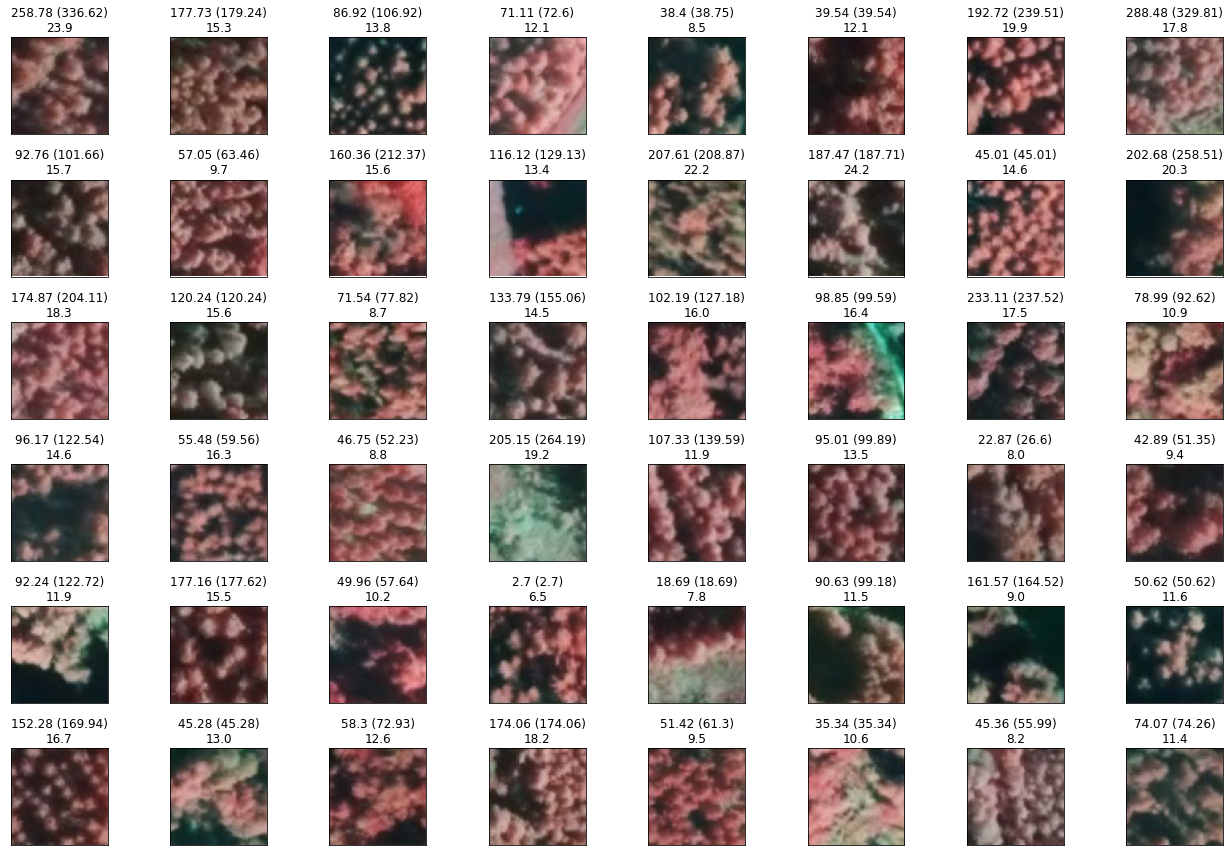

In [8]:
import random
testims = random.sample(lp_images, 48)
fig, axs = plt.subplots(6,8, figsize=(18,12))

for i, a in enumerate(axs.flatten()):
    a.set_xticks([])
    a.set_yticks([])
    im = a.imshow(testims[i].swapaxes(0,2).swapaxes(0,1))
    a.set_title(f'{train[train.lp_maj == 1].iloc[i].v_lp} ({train[train.lp_maj == 1].iloc[i].v})\n{train[train.lp_maj==1].iloc[i].h}')
plt.tight_layout()

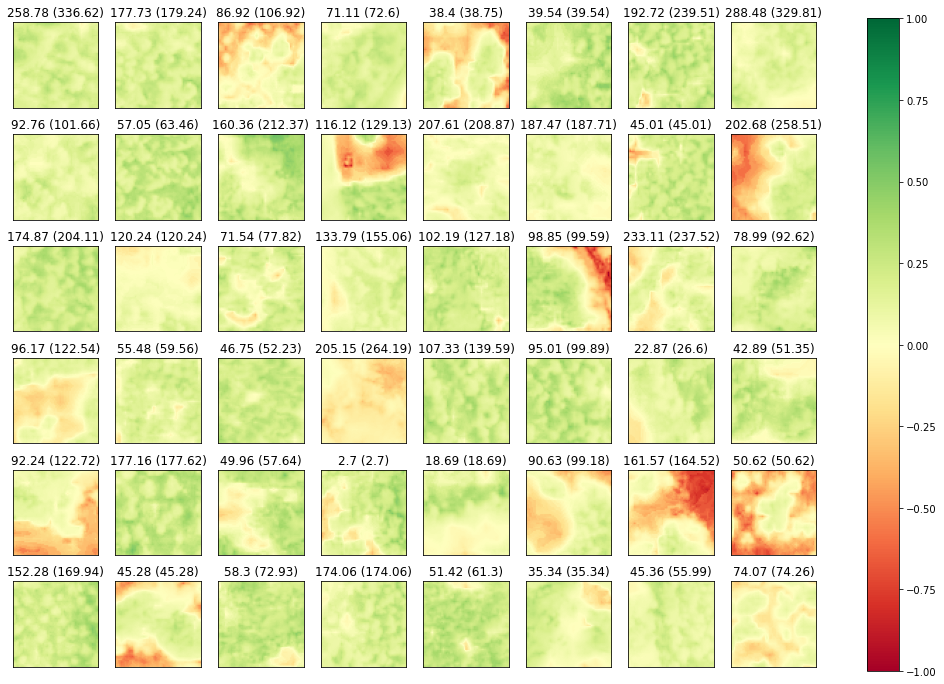

In [12]:
fig, axs = plt.subplots(6,8, figsize=(18,12))
ndvi_ims = [calc_normalized_spectral_index(testim.astype(np.float32), 0, 1) for testim in testims]
for i, a in enumerate(axs.flatten()): 
    a.set_xticks([])
    a.set_yticks([])
    im = a.imshow(ndvi_ims[i], vmin=-1, vmax=1, cmap='RdYlGn')
    a.set_title(f'{train[train.lp_maj == 1].iloc[i].v_lp} ({train[train.lp_maj == 1].iloc[i].v})')

fig.colorbar(im, ax=axs.ravel().tolist())
plt.show()

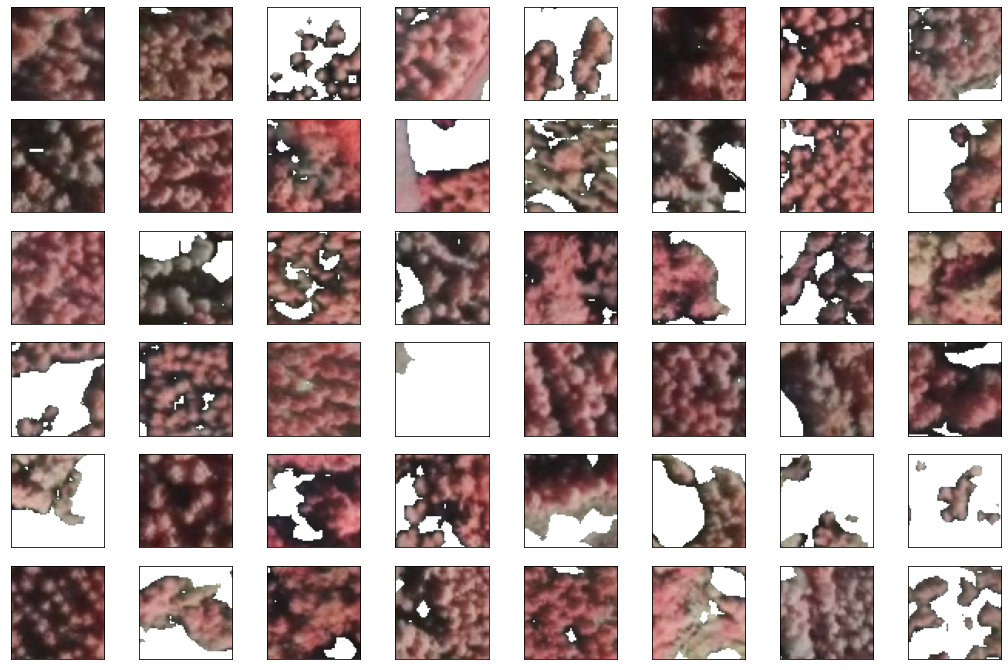

In [13]:
fig, axs = plt.subplots(6,8, figsize=(18,12))
ndvi_tresh = 0.0
for i, a in enumerate(axs.flatten()):
    a.set_xticks([])
    a.set_yticks([])
    tempim = testims[i].copy()
    tempim[:,ndvi_ims[i] <= ndvi_tresh] = 1
    im = a.imshow(tempim.swapaxes(0,2).swapaxes(0,1))

# Correlation

In [77]:
train.head()

,sampleplotid,x,y,measurementdate,g,d,h,v,v_ma,v_ku,...,savi_max,savi_min,savi_mean,savi_std,savi_cv,gci_max,gci_min,gci_mean,gci_std,gci_cv
0,901034,313598.50,6888193.46,2013,30.0,25.9,23.9,336.62,50.11,27.73,...,0.504119,-0.064000,0.201912,0.120302,0.595816,2.487180,-0.409091,0.656783,0.443506,0.675270
1,901038,314591.78,6888461.84,2013,18.6,16.0,15.9,146.00,142.50,0.00,...,0.018634,-0.317719,-0.126928,0.052820,-0.416145,0.126126,-0.709677,-0.287559,0.166732,-0.579817
2,901044,317890.37,6888182.49,2013,26.8,18.4,18.4,240.46,139.89,81.77,...,0.099476,-0.245033,-0.119699,0.041788,-0.349110,0.253521,-0.571429,-0.271222,0.102095,-0.376425
3,901048,318879.42,6888447.55,2013,34.3,20.2,19.3,321.29,72.10,172.35,...,0.207273,-0.162839,-0.012665,0.065094,-5.139762,0.535714,-0.566667,-0.053988,0.195278,-3.617038
4,901054,322193.41,6888196.04,2013,13.8,10.0,9.1,67.10,57.40,9.70,...,0.082833,-0.268839,-0.060555,0.063598,-1.050250,0.283019,-0.481481,-0.019748,0.115661,-5.856907


In [97]:
target_vars = image_metric_cols + ['v_ma', 'v_ku', 'v_lp']

In [98]:
train[image_metric_cols] = train.apply(lambda row: image_metrics(data_path/f'AV_tif/{row.sampleplotid}.tif'), axis=1,
                                       result_type='expand')

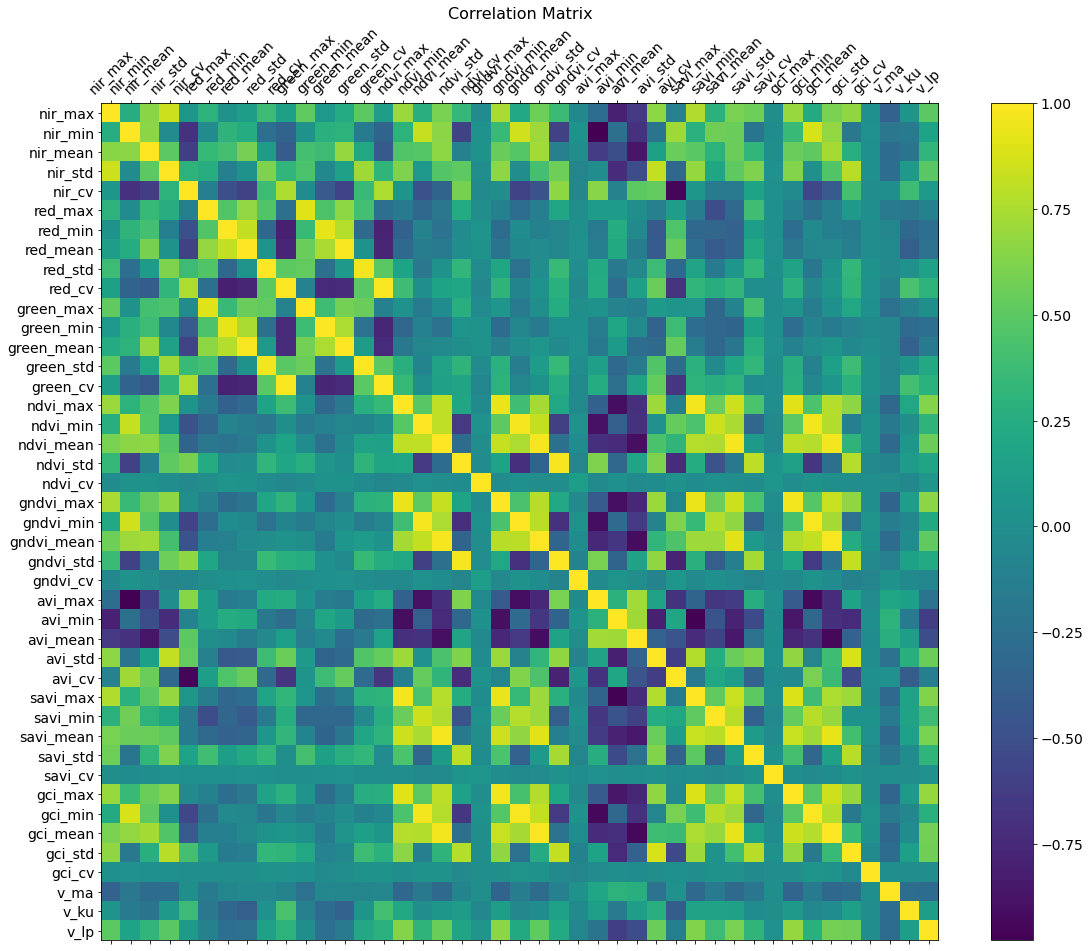

In [99]:
f = plt.figure(figsize=(19,15))
plt.matshow(train[target_vars].corr(), fignum=f.number)
plt.xticks(range(train[target_vars].shape[1]), train[target_vars].columns, fontsize=14, rotation=45)
plt.yticks(range(train[target_vars].shape[1]), train[target_vars].columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [16]:
def pct_ndvi_over_zero(sampleplotid):
    ndvi = calc_normalized_spectral_index(open_geotiff(data_path/f'AV_tif/{sampleplotid}.tif'), 0, 1).ravel()
    return len(ndvi[ndvi>=0]) / len(ndvi)

In [17]:
train['pct_ndvi_over_zero'] = train.apply(lambda row: pct_ndvi_over_zero(row.sampleplotid), axis=1)

In [18]:
train.pct_ndvi_over_zero.describe()

count    1044.000000
mean        0.155620
std         0.195538
min         0.000269
25%         0.030099
50%         0.081430
75%         0.197662
max         0.985219
Name: pct_ndvi_over_zero, dtype: float64

In [20]:
train[train.lp_maj == 1].pct_ndvi_over_zero.describe()

count    48.000000
mean      0.613293
std       0.279634
min       0.116367
25%       0.370398
50%       0.687987
75%       0.822360
max       0.985219
Name: pct_ndvi_over_zero, dtype: float64